In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
drug_data=pd.read_csv("Data/drug200.csv")
drug_data=drug_data.sample(frac=1)
drug_data.head(3)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
3,28,F,NORMAL,HIGH,7.798,drugX
185,57,F,NORMAL,NORMAL,25.893,DrugY
25,28,F,HIGH,NORMAL,18.809,DrugY


In [11]:
X=drug_data.drop('Drug',axis=1).values
Y=drug_data.Drug.values
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=125
)

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

cat_col = [1,2,3]
num_col = [0,4]

transform=ColumnTransformer([('encoder',OrdinalEncoder(),cat_col),
                            ('Imputer',SimpleImputer(strategy='median'),num_col),
                            ('Scaler',StandardScaler(),num_col)])
Model_pipe = Pipeline(steps=[
    ("preprocessing", transform),
    ("model", RandomForestClassifier(n_estimators=100, random_state=125))])

Model_pipe.fit(x_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('encoder', OrdinalEncoder(),
                                                  [1, 2, 3]),
                                                 ('Imputer',
                                                  SimpleImputer(strategy='median'),
                                                  [0, 4]),
                                                 ('Scaler', StandardScaler(),
                                                  [0, 4])])),
                ('model', RandomForestClassifier(random_state=125))])

In [18]:
from sklearn.metrics import f1_score,accuracy_score
pred=Model_pipe.predict(x_test)
accuracy = accuracy_score(y_test, pred)

#f1_score= 2*TP/2*TP+FP+FN
#weighted(by number of samples per class) mean taken of f1_score of each class
f1 = f1_score(y_test, pred, average="weighted") 
print("Accuracy:", str(round(accuracy, 2) * 100) + "%", "F1:", round(f1, 2))

Accuracy: 100.0% F1: 1.0


In [22]:
with open("Output/metrics.txt","w") as file:
    file.write(f"\nAccuracy = {accuracy.round(2)}, F1 Score = {f1.round(2)}.")

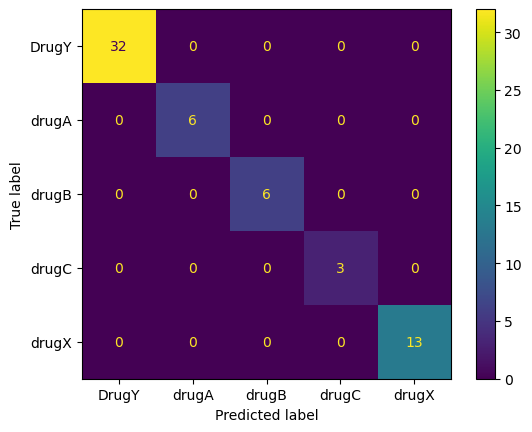

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, pred, labels=Model_pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Model_pipe.classes_)
disp.plot()
plt.savefig("Output/model_results.png", dpi=120)

In [27]:
import skops.io as sio

sio.dump(Model_pipe, "Model/drug_pipeline.skops")

In [29]:
unknown_types = sio.get_untrusted_types(file="Model/drug_pipeline.skops")
print(unknown_types)
sio.load("Model/drug_pipeline.skops", trusted=unknown_types)

['numpy.dtype']


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('encoder', OrdinalEncoder(),
                                                  [1, 2, 3]),
                                                 ('Imputer',
                                                  SimpleImputer(strategy='median'),
                                                  [0, 4]),
                                                 ('Scaler', StandardScaler(),
                                                  [0, 4])])),
                ('model', RandomForestClassifier(random_state=125))])